Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [33]:
import requests
import pandas as pd
import os
import json
stations_df = pd.read_csv('citybikes_stations.csv')
venues_df= pd.read_csv('correct_foursquare_venues.csv')
restaurants_df=pd.read_csv('correct_yelp_restaurants.csv')

merged_df_r = pd.merge(stations_df, restaurants_df, on=('Latitude','Longitude'))
merged_df_v = pd.merge(stations_df, venues_df, on=('Latitude','Longitude'))

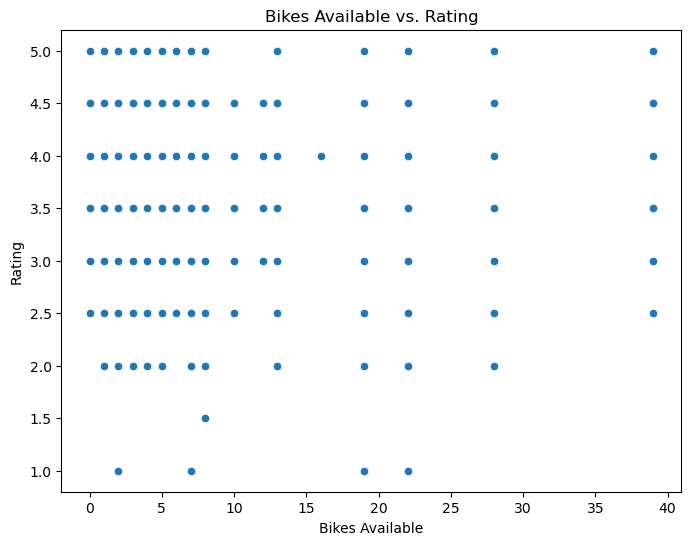

In [47]:
# Scatter plot for Bikes Available vs. Rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bikes Available', y='Rating', data=merged_df_r)
plt.title('Bikes Available vs. Rating')
plt.xlabel('Bikes Available')
plt.ylabel('Rating')
plt.show()

In [53]:
# Average bikes available and empty slots by category
category_stats = merged_df_r.groupby('Categories').agg({'Bikes Available': 'mean', 'Empty Slots': 'mean'})
print(category_stats)

# Number of bike stations with banking service
print("Number of Bike Stations with Banking Service:", merged_df_r[merged_df_r['Banking'] == True]['Banking'].count())



                                                  Bikes Available  Empty Slots
Categories                                                                    
American (Traditional)                                       4.00         16.0
American (Traditional), Burgers                              7.00         38.0
American (Traditional), Wine Bars, Cocktail Bars            10.00         48.0
Auvergnat                                                    4.00         15.0
Bagels, American (Traditional)                              39.00          2.0
...                                                           ...          ...
Vietnamese                                                   7.00         27.0
Wine Bars, Bistros                                          12.25         15.5
Wine Bars, Cafes                                             8.00         27.0
Wine Bars, French                                            5.50         14.0
Yoga, Cafes                                         

In [60]:
# Identify bike stations with a high number of bikes available and empty slots
high_availability_stations = merged_df_r[(merged_df_r['Bikes Available'] > merged_df_r['Bikes Available'].mean()) & (merged_df_r['Empty Slots'] > merged_df_r['Empty Slots'].mean())]
#print("High Availability Stations:")
#print(high_availability_stations)
high_availability_stations


,Name_x,Latitude,Longitude,Bikes Available,Slots,Empty Slots,Banking,Ebikes,Name_y,Categories,Rating,Address,Res_Latitude,Res_Longitude,Reviews,Distance,Phone,Closed,Price
307,Square Boucicaut,48.851296,2.325062,28,60,31,True,9,Les Antiquaires,Bistros,4.5,"13 rue du Bac, Paris",48.858066,2.328237,458,787.820376,3.314261e+10,False,€€€
308,Square Boucicaut,48.851296,2.325062,28,60,31,True,9,Le Pain Quotidien,"Breakfast & Brunch, Bakeries, Coffee & Tea",4.0,"25 rue de Varenne, Paris",48.853860,2.324170,62,280.794192,3.314544e+10,False,€€
309,Square Boucicaut,48.851296,2.325062,28,60,31,True,9,Café Cassette,"Breakfast & Brunch, French, Wine Bars",3.5,"73 rue de Rennes, Paris",48.851080,2.330690,70,412.505666,3.314549e+10,False,€€
310,Square Boucicaut,48.851296,2.325062,28,60,31,True,9,Café Louise,"Cafes, Brasseries",4.0,"155 bd Saint Germain, Paris",48.853878,2.332109,105,590.131606,3.314223e+10,False,€€
311,Square Boucicaut,48.851296,2.325062,28,60,31,True,9,Les Fauves,"French, Breakfast & Brunch",4.5,"33 boulevard Edgar Quinet, Paris",48.842560,2.322584,16,988.221480,3.317239e+10,False,€€€
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,Le Brun - Gobelins,48.835093,2.353468,19,48,29,True,7,Maki Store Paris 5,"Food Delivery Services, Japanese, Pan Asian",1.0,"65 Rue Claude Bernard, Paris",48.840899,2.344475,1,924.705813,3.314337e+10,False,€€€
869,Le Brun - Gobelins,48.835093,2.353468,19,48,29,True,7,Le Grain Magique,Moroccan,3.5,"69 Rue Croulebarbe, Paris 13",48.831600,2.349130,3,501.658963,3.396527e+10,False,€
870,Le Brun - Gobelins,48.835093,2.353468,19,48,29,True,7,Cafe l'Arbalète,Cafes,3.0,"2 rue de l'Arbalète, Paris",48.840562,2.350524,5,645.202142,3.314331e+10,False,€€
871,Le Brun - Gobelins,48.835093,2.353468,19,48,29,True,7,Chez Nénesse,"Brasseries, Pizza, Burgers",3.0,"23 rue de la Butte aux Cailles, Paris",48.827590,2.349530,2,879.041288,3.398231e+10,False,€€


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [41]:
#Find Stations where credit card is accepted
Banking=stations_df[stations_df['Banking']==True]  #where credit card is accepted
Cash=stations_df[stations_df['Banking']==False]    #cash
Bikes=Banking.groupby('Name')['Slots'].sum()
Bikes.sort_values(ascending=False)

Name
Emeriau - Beaugrenelle                    74
Grenelle - Dr Finlay                      71
Censier - Santeuil                        69
Fabre d'Eglantine - Place de la Nation    68
Jean de la Fontaine - Boulainvilliers     68
                                          ..
Place des Abbesses                        12
Desaix - Edgar Faure                      12
Pablo Picasso - Maurice Thorez             0
Place Albert Kahn                          0
Cadet - La Fayette                         0
Name: Slots, Length: 845, dtype: int64

In [8]:
#Check occupancy percentage accprding to Categories assuming less empty slots corresponding to more people
grouped_slots = merged_df.groupby('Categories')['Slots'].sum()
grouped_emptyslots = merged_df.groupby('Categories')['Empty Slots'].sum()
Occupancy = (abs(grouped_slots - grouped_emptyslots) / grouped_slots) * 100
Sorted_Occupancy=Occupancy.sort_values(ascending=False)

top_10_busy_categories=Sorted_Occupancy[:10]
top_10_busy_categories

Categories
French, Lounges                               95.348837
Breakfast & Brunch                            95.348837
Bars, Modern European                         95.348837
Chimney Cakes, Cafes, Coffee & Tea            95.348837
Tex-Mex                                       95.348837
Cuban, Cocktail Bars, Tapas Bars              95.348837
Cajun/Creole, Cocktail Bars                   95.348837
Spanish, Tapas Bars                           95.348837
Bakeries, Breakfast & Brunch, Coffee & Tea    95.348837
Bistros, Coffee & Tea, Cafes                  95.348837
dtype: float64

Categories
Chimney Cakes, Cafes, Coffee & Tea    95.348837
Bakeries, Sandwiches, Salad           95.348837
Pubs, French                          95.348837
Bistros, Coffee & Tea, Cafes          95.348837
Bistros, French, Cafes                95.348837
                                        ...    
Climbing, Brasseries                   0.000000
Brasseries, Bars                       0.000000
Belgian, Beer Bar                      0.000000
Lounges, French, Brasseries            0.000000
Cocktail Bars, Tapas/Small Plates      0.000000
Length: 198, dtype: float64
Categories
Sandwiches, Vietnamese                    85.185185
Chinese, Pan Asian                        85.185185
French, Cocktail Bars                     73.333333
Brasseries, Bistros, Bars                 73.333333
Hotels, Breakfast & Brunch                73.333333
                                            ...    
Korean, Barbeque, Karaoke                 13.461538
Brasseries, Coffee & Tea, French          13.461538
Tobacc

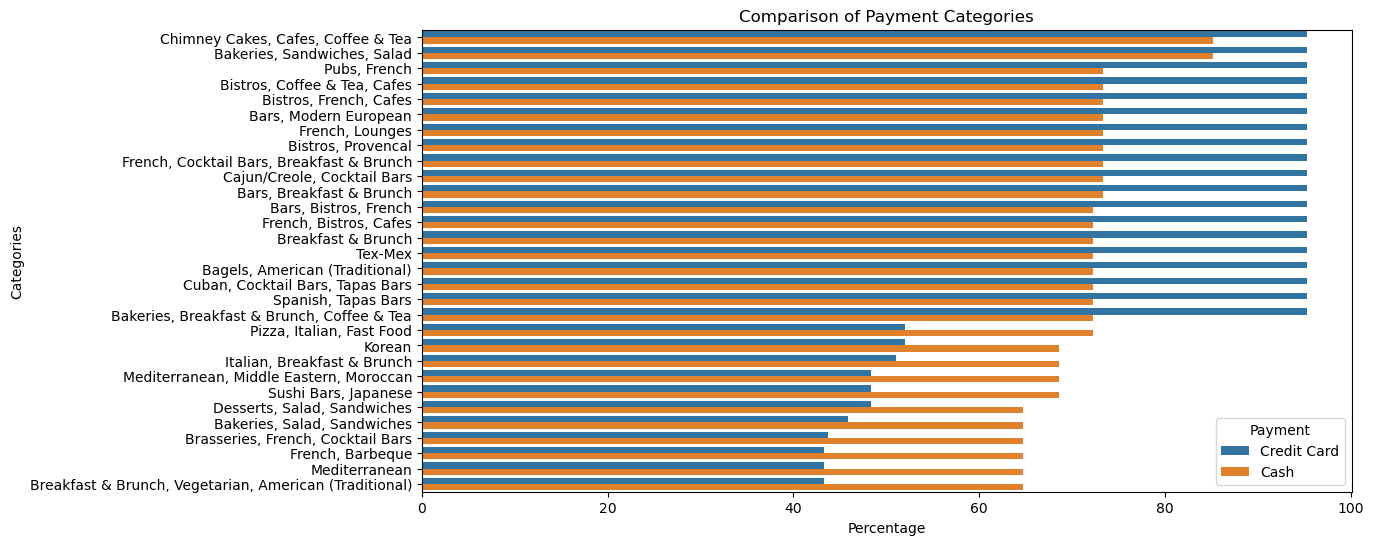

In [10]:
#Checking Occupancy based on payment facilities
Banking=merged_df[merged_df['Banking']==True]  #where credit card is accepted
Cash=merged_df[merged_df['Banking']==False]    #cash


grouped_slots_b = Banking.groupby('Categories')['Slots'].sum()
grouped_emptyslots_b = Banking.groupby('Categories')['Empty Slots'].sum()

grouped_slots_c = Cash.groupby('Categories')['Slots'].sum()
grouped_emptyslots_c = Cash.groupby('Categories')['Empty Slots'].sum()


percentage_difference_b = (abs(grouped_slots_b - grouped_emptyslots_b) / grouped_slots_b) * 100
percentage_difference_c = (abs(grouped_slots_c - grouped_emptyslots_c) / grouped_slots_c) * 100


print(percentage_difference_b.sort_values(ascending=False))
print(percentage_difference_c.sort_values(ascending=False))

Most_occupied=percentage_difference_b.sort_values(ascending=False) #most occupied categories where credit card is accepted
Most_occupied=Most_occupied[:30]

Most_occupied_c=percentage_difference_c.sort_values(ascending=False) #most occupied categories where cash is accepted
Most_occupied_c=Most_occupied_c[:30]

import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame({
    'Categories': Most_occupied.index,
    'Credit Card': Most_occupied.values,
    'Cash': Most_occupied_c.values
})

# Melt the DataFrame to create a long-form version suitable for plotting
df_melted = df.melt(id_vars='Categories', var_name='Payment', value_name='Percentage')

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Percentage', y='Categories', hue='Payment', data=df_melted, orient='h')
plt.xlabel('Percentage')
plt.ylabel('Categories')
plt.title('Comparison of Payment Categories')
plt.show()

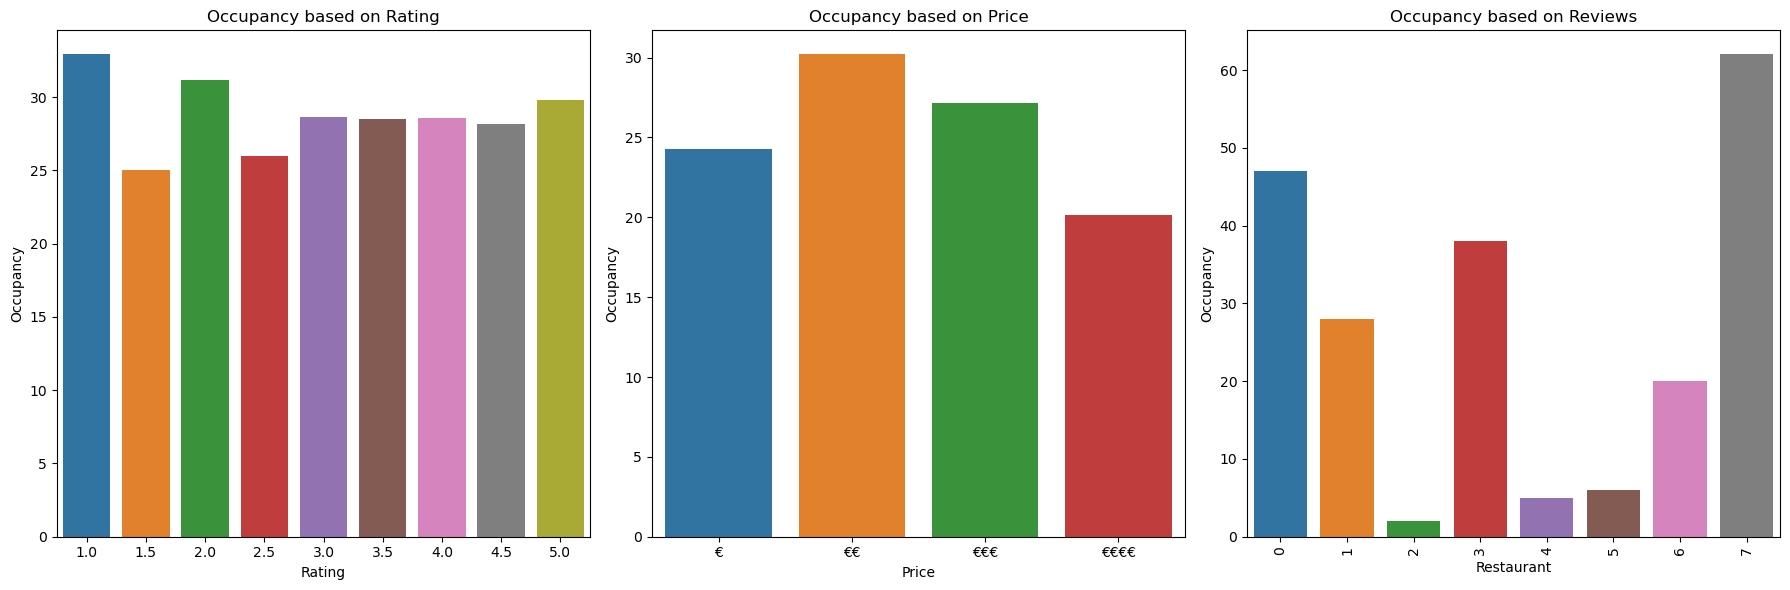

In [11]:
#Occupancy based on Rating,Review and Price

grouped_slots_r = merged_df.groupby('Rating')['Slots'].sum()              #Occupancy % by Rating
grouped_emptyslots_r = merged_df.groupby('Rating')['Empty Slots'].sum()
percentage_difference_r = (abs(grouped_slots_r - grouped_emptyslots_r) / grouped_slots_r) * 100
percentage_difference_r.sort_values(ascending=False)
grouped_emptyslots_r.sort_values(ascending=False)

grouped_slots_p = merged_df.groupby('Price')['Slots'].sum()              #Occupancy % by Price
grouped_emptyslots_p = merged_df.groupby('Price')['Empty Slots'].sum()
percentage_difference_p = (abs(grouped_slots_p - grouped_emptyslots_p) / grouped_slots_p) * 100
percentage_difference_p.sort_values(ascending=False)

reviews=merged_df.sort_values('Reviews', ascending=False)                #Occupancy % by Reviews
reviews=reviews[:10]
grouped_slots_re = reviews.groupby('Name_x')['Slots'].sum()
grouped_emptyslots_re = reviews.groupby('Name_x')['Empty Slots'].sum()
percentage_difference_re = (abs(grouped_slots_re - grouped_emptyslots_re) / grouped_slots_re) * 100
percentage_difference_re.sort_values(ascending=False)


import matplotlib.pyplot as plt
import seaborn as sns


# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Occupancy based on Rating
sns.barplot(x=percentage_difference_r.index, y=percentage_difference_r.values, ax=axes[0])
#axes[0].set_xticklabels(axes[0].get_xticks(), rotation=90)
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Occupancy')
axes[0].set_title('Occupancy based on Rating')

# Plot 2: Occupancy based on Price
sns.barplot(x=percentage_difference_p.index, y=percentage_difference_p.values, ax=axes[1])
#axes[1].set_xticklabels(axes[1].get_xticks(), rotation=90)
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Occupancy')
axes[1].set_title('Occupancy based on Price')

# Plot 3: Empty Slots based on 'Reviews'
sns.barplot(x=grouped_emptyslots_re.index, y=grouped_emptyslots_re.values, ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticks(), rotation=90)
axes[2].set_xlabel('Restaurant')
axes[2].set_ylabel('Occupancy')
axes[2].set_title('Occupancy based on Reviews')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## OBSERVATION
Above Analysis shows that restaurants near bike stations with credit card payment facility are more occupied than stations where only cash is accepeted.
Occupancy based on rating,Reviews and Price suggests that people prefer to go where price is reasonable and high number of reviews over rating.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [26]:
import sqlite3
import csv

# Connect to the SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('Around_BikeRentals.db')

# Create a cursor object using the cursor() method
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS Bike_Stations(
    Name TEXT NOT NULL,
    Latitude FLOAT NOT NULL,
    Longitude FLOAT NOT NULL,
    Bikes_Available INTEGER,
    Slots INTEGER,
    Empty_Slots INTEGER,
    Banking BOOLEAN,
    Ebikes INTEGER,
    PRIMARY KEY (Latitude, Longitude))'''
              )

# reading data from the CSV file
with open('citybikes_stations.csv') as f:
   reader = csv.reader(f)
   data = list(reader)
    
# inserting data into the table
for row in data:
   cursor.execute("INSERT INTO Bike_Stations (Name, Latitude,Longitude,Bikes_Available,Slots,Empty_Slots,Banking,Ebikes) values (?, ?,?,?,?,?,?,?)", row)

conn.commit()


In [30]:
cursor.execute('''CREATE TABLE IF NOT EXISTS Foursquare_Venues(
    Name TEXT NOT NULL,
    Category TEXT,
    Closed_Bucket STRING,
    Distance INTEGER,
    Latitude FLOAT NOT NULL,
    Longitude FLOAT NOT NULL,
    FOREIGN KEY (Latitude, Longitude) REFERENCES Bike_Stations(Latitude, Longitude))''')
# reading data from the CSV file
with open('correct_foursquare_venues.csv') as f:
   reader = csv.reader(f)
   data = list(reader)
    
# inserting data into the table
for row in data:
   cursor.execute("INSERT INTO Foursquare_Venues (Name, Category,Closed_Bucket,Distance,Latitude,Longitude) values (?, ?,?,?,?,?)", row)

conn.commit()

Look at the data before and after the join to validate your data.

In [17]:
# reading data from the CSV file
with open('correct_foursquare_venues.csv') as f:
   reader = csv.reader(f)
   data = list(reader)
    
# inserting data into the table
for row in data:
   cursor.execute("INSERT INTO Foursquare_Venues (Name, Category,Closed_Bucket,Distance,Latitude,Longitude) values (?, ?,?,?,?,?)", row)

conn.commit()

In [31]:
cursor.execute('''CREATE TABLE IF NOT EXISTS Yelp_Restuarants(
    Name TEXT NOT NULL,
    Categories TEXT,
    Rating FLOAT,
    Address TEXT,
    Res_Latitude FLOAT,
    Res_Longitude FLOAT,
    Reviews INTEGER,
    Distance INTEGER,
    Phone VARCHAR(12),
    Closed BOOLEAN,
    Price STRING,
    Latitude FLOAT NOT NULL,
    Longitude FLOAT NOT NULL,
    FOREIGN KEY (Latitude, Longitude) REFERENCES Bike_Stations(Latitude, Longitude))
    ''')
# reading data from the CSV file
with open('correct_yelp_restaurants.csv') as f:
   reader = csv.reader(f)
   data = list(reader)
    
# inserting data into the table
for row in data:
   cursor.execute("INSERT INTO Yelp_Restuarants (Name, Categories,Rating,Address,Res_Latitude,Res_Longitude,Reviews,Distance,Phone,Closed,Price,Latitude,Longitude) values (?, ?,?,?,?,?,?,?,?,?,?,?,?)", row)

conn.commit()

## NOTE: I have created composite primary key (Latitude,Longitude) in Bike_stations table and Foreign key on same columns in Yelp_Restuarants and Foursquare_Venues

# Query to check stations and bikes near famous restaurants (as per reviews)
select yr.Name as Reataurant,Reviews,Rating,Distance,bs.Name as Station,Empty_Slots,Bikes_Available from Yelp_Restuarants as yr
JOIN Bike_Stations AS bs ON yr.Latitude = bs.Latitude AND yr.Longitude = bs.Longitude
order by Reviews Desc limit 20;


SELECT * FROM Foursquare_Venues AS fv
JOIN Bike_Stations AS bs ON fv.Latitude = bs.Latitude AND fv.Longitude = bs.Longitude;

SELECT * FROM Yelp_Restuarants AS yr
JOIN Bike_Stations AS bs ON yr.Latitude = bs.Latitude AND yr.Longitude = bs.Longitude;
